In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, model_selection, linear_model, preprocessing


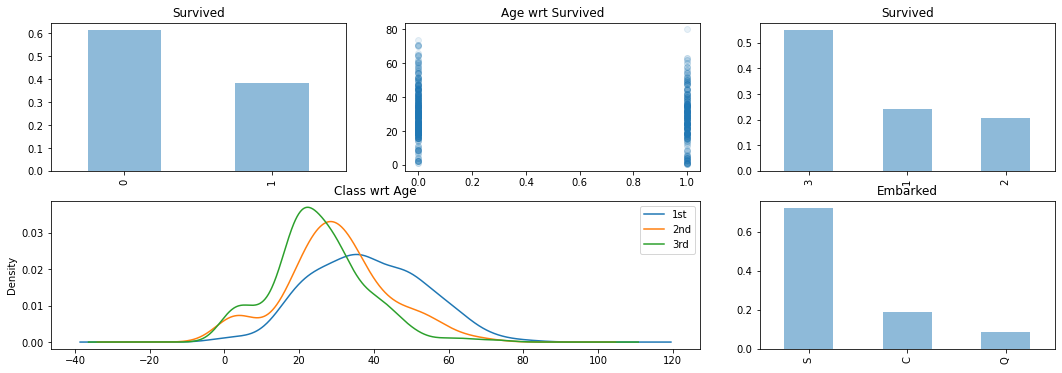

In [10]:
#!
df = pd.read_csv("train.csv")
cfig = plt.figure(figsize=(18,6))
plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar',alpha = 0.5)
plt.title("Survived")

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age,alpha = 0.1)
plt.title("Age wrt Survived")

plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts(normalize=True).plot(kind='bar',alpha = 0.5)
plt.title("Survived")

plt.subplot2grid((2,3),(1,0),colspan=2)
for x in [1,2,3]:
  df.Age[df.Pclass == x].plot(kind = "kde")
plt.title("Class wrt Age")
plt.legend(("1st","2nd","3rd"))

plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Embarked")

plt.show()

Text(0.5, 1.0, 'Poor Women Survived')

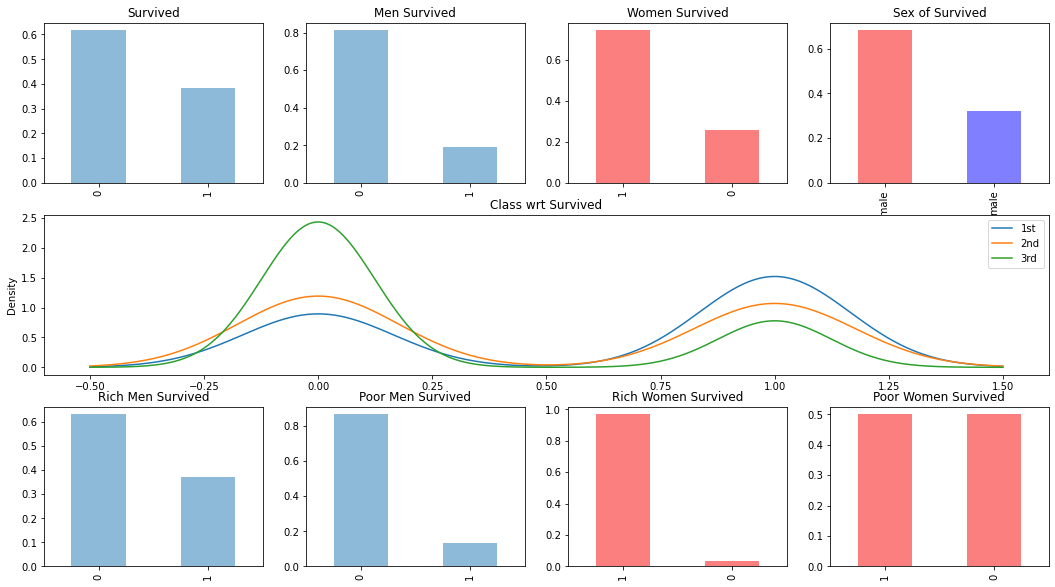

In [11]:
fig = plt.figure(figsize=(18,10))

female_color = "#FA0000"

plt.subplot2grid((3,4),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar',alpha = 0.5)
plt.title("Survived")

plt.subplot2grid((3,4),(0,1))
df.Survived[df.Sex == "male"].value_counts(normalize=True).plot(kind='bar',alpha = 0.5)
plt.title("Men Survived")

plt.subplot2grid((3,4),(0,2))
df.Survived[df.Sex == "female"].value_counts(normalize=True).plot(kind='bar',alpha = 0.5, color = female_color)
plt.title("Women Survived")

plt.subplot2grid((3,4),(0,3))
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind='bar',alpha = 0.5, color = [female_color,"b"])
plt.title("Sex of Survived")

plt.subplot2grid((3,4),(1,0), colspan = 4)
for x in [1,2,3]:
  df.Survived[df.Pclass == x].plot(kind = "kde")
plt.title("Class wrt Survived")
plt.legend(("1st","2nd","3rd"))

plt.subplot2grid((3,4),(2,0))
df.Survived[(df.Sex =="male") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind = "bar",alpha=0.5)
plt.title("Rich Men Survived")

plt.subplot2grid((3,4),(2,1))
df.Survived[(df.Sex =="male") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind = "bar",alpha=0.5)
plt.title("Poor Men Survived")

plt.subplot2grid((3,4),(2,2))
df.Survived[(df.Sex =="female") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind = "bar",alpha=0.5,color = female_color)
plt.title("Rich Women Survived")

plt.subplot2grid((3,4),(2,3))
df.Survived[(df.Sex =="female") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind = "bar",alpha=0.5,color = female_color)
plt.title("Poor Women Survived")


In [12]:
train = pd.read_csv("train.csv")

train["Hyp"] = 0
train.loc[train.Sex == "female", "Hyp"] = 1

train["Result"] = 0
train.loc[train.Survived == train["Hyp"], "Result"] = 1

print(train["Result"].value_counts(normalize=True))

1    0.786756
0    0.213244
Name: Result, dtype: float64


In [13]:
def clean_data(data):
  data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
  data["Age"] = data["Age"].fillna(data["Age"].dropna().median())

  data.loc[data["Sex"] == "male","Sex"] = 0
  data.loc[data["Sex"] == "female","Sex"] = 1

  data["Embarked"] = data["Embarked"].fillna("S")
  data.loc[data["Embarked"] == "S", "Embarked"] = 0
  data.loc[data["Embarked"] == "C", "Embarked"] = 1
  data.loc[data["Embarked"] == "Q", "Embarked"] = 2

  return(data)

In [14]:
train = pd.read_csv("train.csv")
train = clean_data(train)

target = train["Survived"].to_numpy()
features = train[["Pclass", "Age","Fare","Embarked","Sex","SibSp","Parch"]].to_numpy() 

In [15]:
classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target)

print(classifier_.score(features, target))

poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(poly_features, target)
print(classifier_.score(poly_features,target))

0.8013468013468014
0.8002244668911336


c:\users\jorik\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\jorik\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [16]:
train = pd.read_csv("train.csv")
train = clean_data(train)

target = train["Survived"].to_numpy()
feature_names = ["Pclass", "Age","Fare","Embarked","Sex","SibSp","Parch"]
feature = train[feature_names].to_numpy()

generalised_tree = tree.DecisionTreeClassifier(
    random_state = 1,
    max_depth = 7,
    min_samples_split = 2)
generalised_tree_ = generalised_tree.fit(feature,target)
print(generalised_tree_.score(feature,target))

scores = model_selection.cross_val_score(generalised_tree,features,target,scoring="accuracy", cv = 50)
print(scores)
print(scores.mean())


tree.export_graphviz(generalised_tree_, feature_names=feature_names, out_file = "tree.dot")


0.8787878787878788
[0.77777778 0.66666667 0.77777778 0.94444444 0.83333333 0.88888889
 0.61111111 0.83333333 0.88888889 0.88888889 0.72222222 0.66666667
 0.83333333 0.77777778 0.72222222 0.83333333 0.94444444 0.72222222
 0.94444444 0.83333333 0.88888889 0.83333333 0.83333333 0.88888889
 0.94444444 0.83333333 0.83333333 0.83333333 0.77777778 0.88888889
 0.72222222 0.66666667 0.88888889 0.88888889 0.83333333 0.77777778
 0.72222222 0.66666667 0.88888889 0.77777778 0.83333333 0.88235294
 0.76470588 0.88235294 0.88235294 0.64705882 0.88235294 0.76470588
 1.         0.94117647]
0.8196078431372549
